**ECUACIÓN UNIVERSAL DE LA ELÁSTICA**

In [3]:
!pip install spb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
pytensor 2.10.1 requires setuptools>=48.0.0, but you have setuptools 42.0.2 which is incompatible.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 42.0.2 which is incompatible.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 42.0.2 which is incompatible.


In [52]:
from sympy import SingularityFunction,symbols,Function,factorial,integrate
import matplotlib.pyplot as plt
import numpy as np
from sympy.plotting import plot
from sympy import init_printing
from sympy import *
from spb import *
from IPython.display import display, Math

In [5]:
x, a, n = symbols('x, a, n')

In [6]:
Fn = SingularityFunction(x, a, n)

Definimos las funciones de discontinuidad como

In [7]:
Fn

SingularityFunction(x, a, n)

Siendo $n$ el orden de la función, y el valor $a$ el cual a partir del cual la variable independiente $x$ tiene un valor no nulo

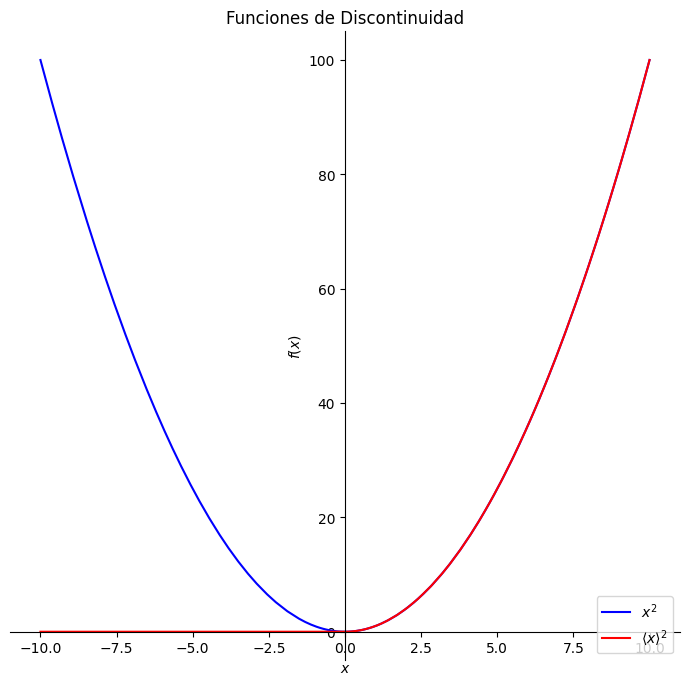

In [53]:
centred_Fn_so = Fn.subs(a, 0).subs(n, 2)
p1 = plot(x*x,line_dash="dotted", line_color='blue',linewidth=1, title='Funciones de Discontinuidad', legend=True, size = (7,7), show=False)
p2 = plot(centred_Fn_so, show=False, line_color='red')
p1.append(p2[0])
p1.show()

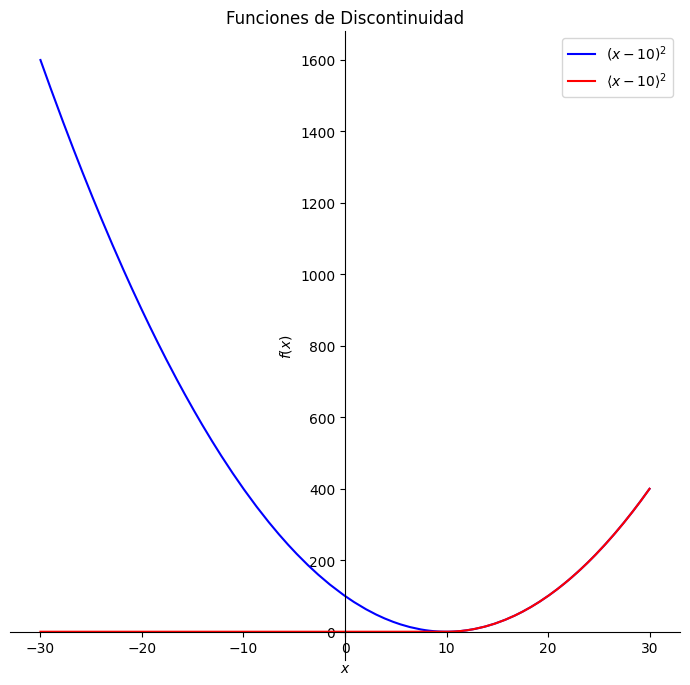

In [30]:
no_centred_Fn_so = Fn.subs(a, 10).subs(n, 2)
p1 = plot((x-10)**2, (x, -30, 30), show=False, line_color='blue', title='Funciones de Discontinuidad', legend=True, size = (7,7))
p2 = plot(no_centred_Fn_so, (x, -30, 30),line_dash="dotted", show=False, line_color='red')
p1.append(p2[0])
p1.show()

EJERCICIO VIGA SIMPLEMENT APOYADA CON DOS MOMENTOS PUNTUALES

In [ ]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/EnriqueGarMac/Estructuras_I.git to /tmp/pip-req-build-nlyja91y
  Running command git clone --filter=blob:none --quiet https://github.com/EnriqueGarMac/Estructuras_I.git /tmp/pip-req-build-nlyja91y
  Resolved https://github.com/EnriqueGarMac/Estructuras_I.git to commit da2ba9a6565745b817dcbfd2d6e0acf678724858
  Preparing metadata (setup.py) ... done
  Created wheel for anastruct: filename=anastruct-0.0.0-py3-none-any.whl size=66159 sha256=d5fd762fc849aa6b4d3015ecc5753c5a5d5db05563afbc1903daf20bde5da2b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-m14_w3mt/wheels/e2/a1/ba/be6d6bbfec957c263f9e190f03a5f0c87e83453ad4fe68d5ed
Successfully built anastruct


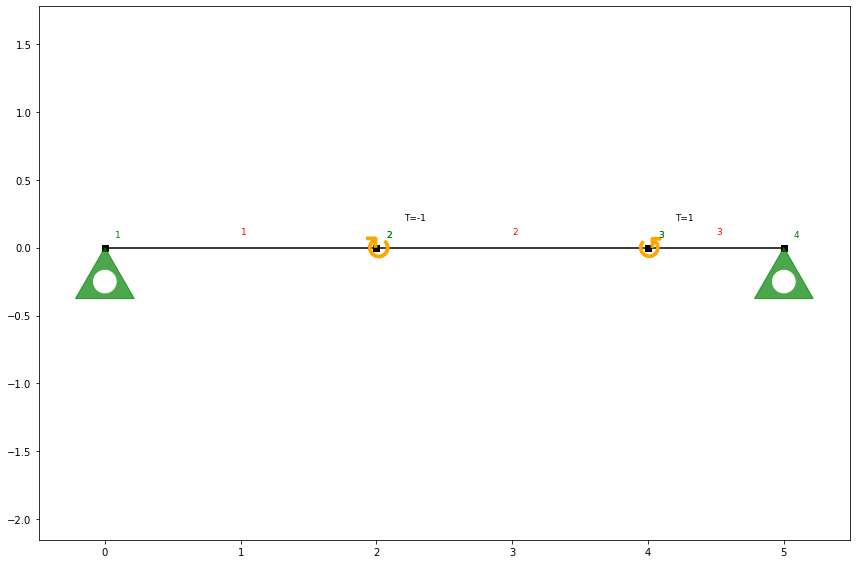

In [ ]:
import numpy as np
from anastruct import SystemElements


A = 1.0
Gamm = 1.0

ss = SystemElements()

# Añadimos elemento barra 1
ss.add_element(location=[[0.0, 0.0], [2*A,0.0]])
ss.add_element(location=[[2*A,0.0], [4*A,0.0]])
ss.add_element(location=[[4*A,0.0], [5*A,0.0]])

# Añadimos momentos puntuales
ss.moment_load(2, Ty=Gamm)
ss.moment_load(3, Ty=-Gamm)

# Añadimos empotramiento al nodo 1
ss.add_support_hinged(node_id=1)
ss.add_support_hinged(node_id=4)

# Mostramos estructura generada
ss.show_structure()

In [ ]:
# Resolvemos la estructura
ss.solve()

 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -0.0   0.0
2  ->  -0.0   -0.0003200000000000004
3  ->  -0.0   -0.00024000000000000036
4  ->  -0.0   0.0


array([-0.     ,  0.     ,  0.00016, -0.     , -0.00032,  0.00016,
       -0.     , -0.00024, -0.00024, -0.     ,  0.     , -0.00024])

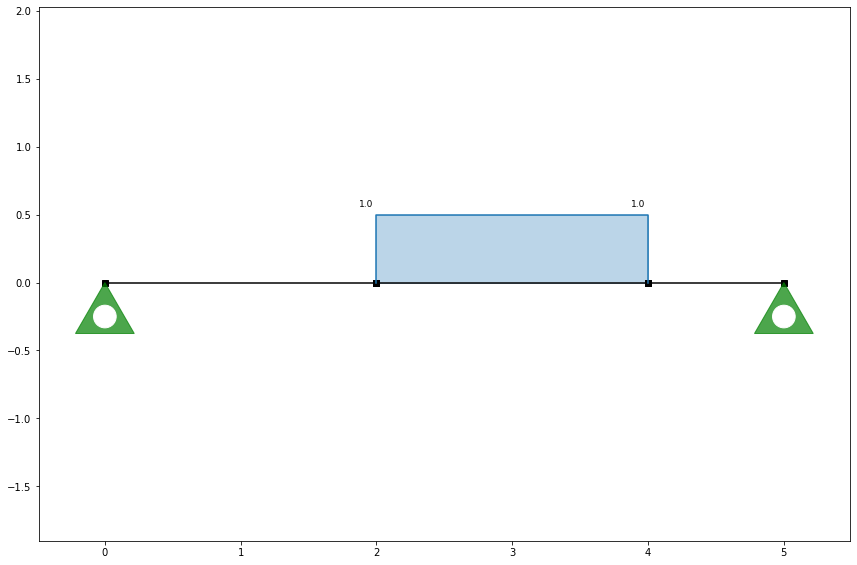

In [ ]:
# Mostramos flectores
ss.show_bending_moment()

Ahora lo resolvemos usando la EUE

In [ ]:
A = Symbol('A', positive=True)
Mp = Symbol('Mp', positive=True)
M = Mp*SingularityFunction(x, 2*A, 0.0)-Mp*SingularityFunction(x, 4*A, 0.0)
M


             0.0                0.0
Mp⋅<-2⋅A + x>    - Mp⋅<-4⋅A + x>   

Ecuación curvaturas

In [ ]:
EI, kap, theta, y = symbols('EI, kappa, theta, y')
C1 = Symbol('C_1')
C2 = Symbol('C_2')

In [ ]:
display(Math(latex(EI*kap)+' = '+ latex(M)))

<IPython.core.display.Math object>

Ecuación de giros

In [ ]:
display(Math(latex(EI*theta)+' = '+ latex(integrate(M,x))+latex(C1)))

<IPython.core.display.Math object>

Ecuación de flechas

In [ ]:
display(Math(latex(EI*y)+' = '+ latex(integrate(integrate(M,x),x))+latex(C1*x)+'+'+latex(C2)))

<IPython.core.display.Math object>

Aplicamos las condiciones de borde y(0)=y(5A)=0

In [ ]:
from sympy import solve, nsolve
y = integrate(integrate(M,x),x)+C1*x+C2

In [ ]:
solve((y.subs(x, 0.),y.subs(x, 5*A)), C1,C2)

{C₁: -0.8⋅A⋅Mp, C₂: 0.0}

In [ ]:
Aval = 1.0
Mp_val = 1.0
C1_val = -0.8*Aval*Mp_val
C2_val = 0.0

import numpy as np
def M_x(xv):
  moment = np.empty([])
  for i in xv:
    moment = np.append(moment,float(M.subs(A,Aval).subs(Mp,Mp_val).subs(x,i)))
  return moment[1:]

def rot(xv):
  rot = np.empty([])
  rotfun = integrate(M,x)+C1
  for i in xv:
    rot = np.append(rot,float(rotfun.subs(A,Aval).subs(C1,C1_val).subs(Mp,Mp_val).subs(x,i)))
  return rot[1:]

def y_fun(xv):
  y_f = np.empty([])
  yfun = integrate(integrate(M,x),x)+C1*x+C2
  for i in xv:
    y_f = np.append(y_f,float(yfun.subs(A,Aval).subs(Mp,Mp_val).subs(C1,C1_val).subs(C2,C2_val).subs(x,i)))
  return y_f[1:]

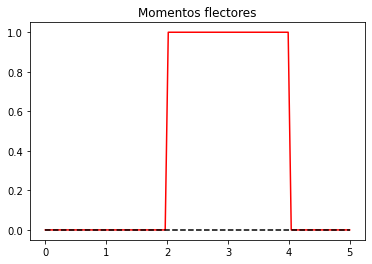

In [ ]:
import matplotlib.pyplot as plt

xv = np.linspace(0,5,100)
yv = M_x(xv)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Momentos flectores')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(xv,yv, 'r')
plt.plot(xv,yv*0, '--k')

# show the plot
plt.show()


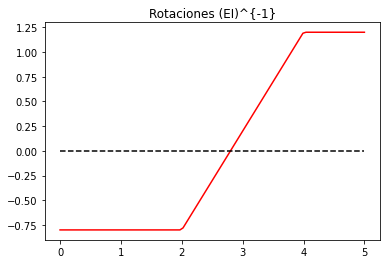

In [ ]:
yv = rot(xv)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Rotaciones (EI)^{-1}')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(xv,yv, 'r')
plt.plot(xv,yv*0, '--k')

# show the plot
plt.show()


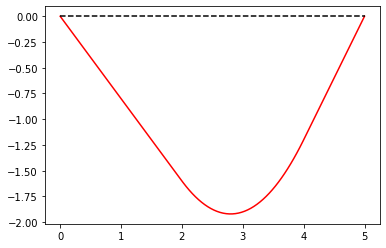

In [ ]:
fyv = y_fun(xv)

ig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Flechas (EI)^{-1}')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(xv,fyv, 'r')
plt.plot(xv,yv*0, '--k')

# show the plot
plt.show()
